In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv('data/kc_house_data.csv')

In [3]:
grade_num = []
for index, row in df.iterrows():
    grade_num.append(int((str(row['grade'])[0:2])))
df['grade_num'] = grade_num
df.drop('grade', axis = 1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_num
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,7
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,7
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,6
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,7
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,8
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,8
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,7
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,8


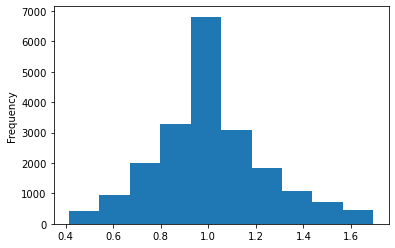

In [4]:
df.sqft_living.describe()
df['sqft_living_ratio'] = df['sqft_living'] / df['sqft_living15']
df.sqft_living_ratio.describe()


df['sqft_living_ratio'] = df.sqft_living / df.sqft_living15
df['sqft_living_ratio'] = df['sqft_living_ratio'].loc[(np.abs(stats.zscore(df.sqft_living_ratio)) < 2)]
df = df.dropna(subset = ['sqft_living_ratio'])
df.sqft_living_ratio.plot.hist();

count    20386.000000
mean         1.042518
std          0.312278
min          0.054972
25%          0.933333
50%          1.000000
75%          1.077654
max          3.275862
Name: sqft_lot_ratio, dtype: float64

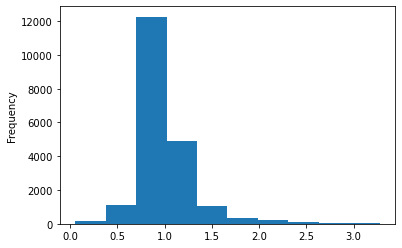

In [5]:
df.sqft_lot15.describe()
df['sqft_lot_ratio'] = df['sqft_lot'] / df['sqft_lot15']
df.sqft_lot_ratio.describe()

df['sqft_lot_ratio'] = df.sqft_lot / df.sqft_lot15
df['sqft_lot_ratio'] = df['sqft_lot_ratio'].loc[(np.abs(stats.zscore(df.sqft_lot_ratio)) < 2)]
df = df.dropna(subset = ['sqft_lot_ratio'])
df.sqft_lot_ratio.plot.hist();
df.sqft_lot_ratio.describe()

In [6]:
from statsmodels.formula.api import ols
X = df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','sqft_living15', 'sqft_lot15', 'grade_num']]
y = df.price

formula = 'price~ bedrooms + bathrooms + sqft_living_ratio + sqft_lot_ratio + C(waterfront) + floors + C(zipcode) + grade_num'
regression = ols(formula, data = df).fit().summary()

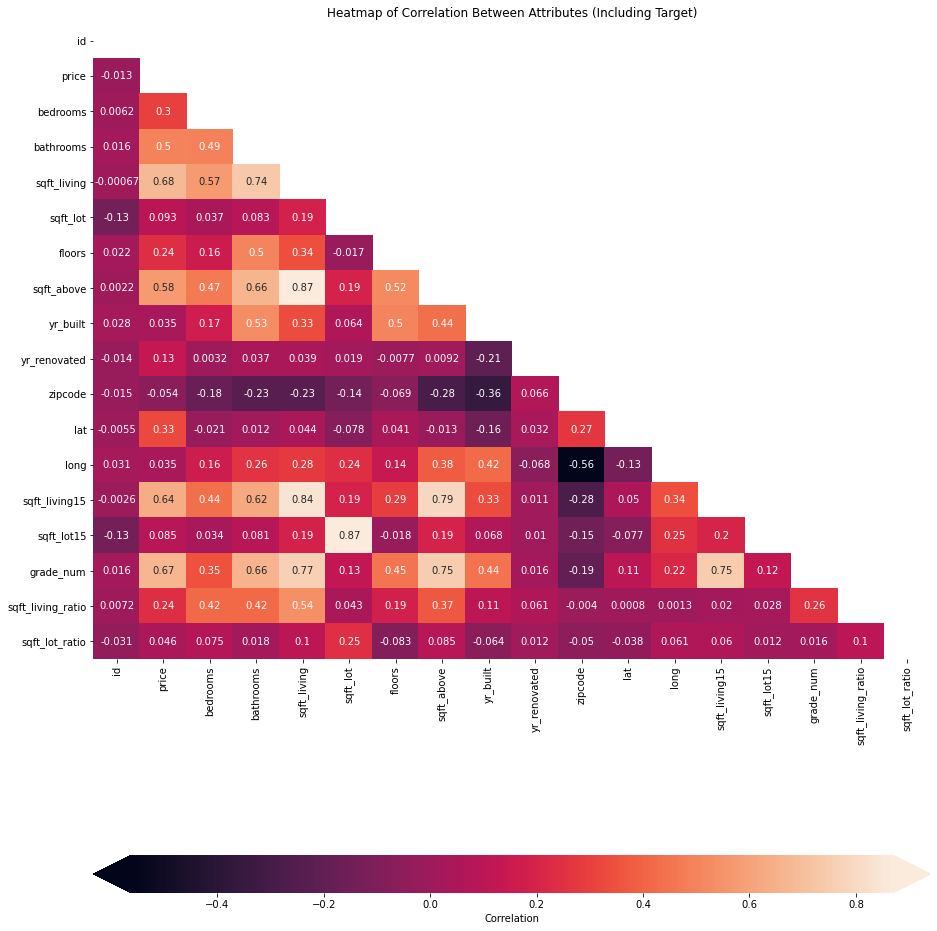

In [7]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 18))
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

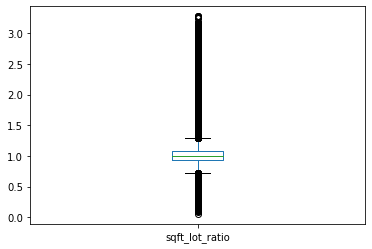

In [8]:
df.sqft_lot15.describe()
df['sqft_lot_ratio'] = df['sqft_lot'] / df['sqft_lot15']
df.sqft_lot_ratio.describe()
df.sqft_lot_ratio.plot.box()

df['sqft_lot_ratio'] = df.sqft_living / df.sqft_living15
df['sqft_lot_ratio'] = df['sqft_lot_ratio'].loc[(np.abs(stats.zscore(df.sqft_living_ratio)) < 2)]
df = df.dropna(subset = ['sqft_living_ratio'])

In [9]:
#Importing modules, tools, etc.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.formula.api import ols

#importing main dataframe as df
df = pd.read_csv('data/kc_house_data.csv')

12764    13540
7245     12050
3910     10040
9245      9890
8085      9640
         ...  
11488      420
8614       410
21316      390
860        380
15367      370
Name: sqft_living, Length: 21597, dtype: int64
4980.0


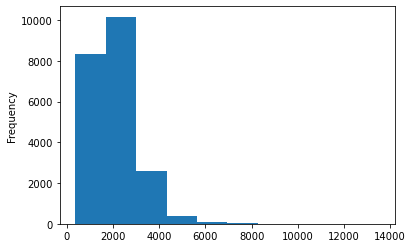

In [10]:
#Converting grade column to an int value

#Create a dummy list
grade_num = []

#Go through each row, grabbing the first index off the string, conver to int
for index, row in df.iterrows():
    grade_num.append(int((str(row['grade'])[0:2])))

#drop the old column and add the new
df['grade_num'] = grade_num
df.drop('grade', axis = 1)

# Turning NaNs in the waterfront data into NO's, then converting waterfront to binary.
# 0 is a waterfront no, 1 is a waterfront yes
#

df.waterfront.fillna(value='NO', inplace = True)
df.waterfront.replace( to_replace = ['NO','YES'], value =  [0,1], inplace = True)

print(df['sqft_living'].sort_values(ascending = False))
#Those are some big results.
print(df['sqft_living'].quantile(0.99))
# even the 99 percentile is still sub 5000. 
df['sqft_living'].plot(kind = 'hist');
#Plotting this shows a bit skew right.


#It may be wise to shave the model off around there.

<AxesSubplot:ylabel='Frequency'>

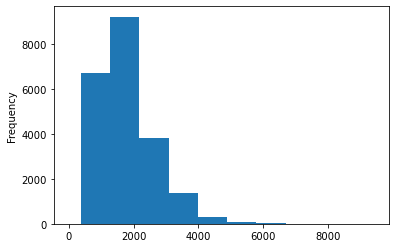

In [11]:
df['sqft_above'].sort_values(ascending = False) 
df['sqft_above'].quantile(.99)
#Not quite as extreme as sqft_livable

df['sqft_above'].plot(kind='hist');

df.sqft_living.describe()
df['sqft_living_ratio'] = df['sqft_living'] / df['sqft_living15']
df.sqft_living_ratio.describe()


df['sqft_living_ratio'] = df.sqft_living / df.sqft_living15
df['sqft_living_ratio'] = df['sqft_living_ratio'].loc[(np.abs(stats.zscore(df.sqft_living_ratio)) < 2)]
df = df.dropna(subset = ['sqft_living_ratio'])
df.sqft_living_ratio.plot.hist()

count    20386.000000
mean         1.042518
std          0.312278
min          0.054972
25%          0.933333
50%          1.000000
75%          1.077654
max          3.275862
Name: sqft_lot_ratio, dtype: float64

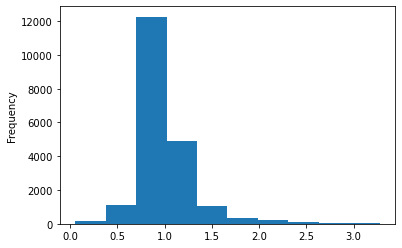

In [12]:
df.sqft_lot15.describe()
df['sqft_lot_ratio'] = df['sqft_lot'] / df['sqft_lot15']
df.sqft_lot_ratio.describe()

df['sqft_lot_ratio'] = df.sqft_lot / df.sqft_lot15
df['sqft_lot_ratio'] = df['sqft_lot_ratio'].loc[(np.abs(stats.zscore(df.sqft_lot_ratio)) < 2)]
df = df.dropna(subset = ['sqft_lot_ratio'])
df.sqft_lot_ratio.plot.hist()
df.sqft_lot_ratio.describe()

In [13]:
df['floors'].value_counts()
#Seems reasonable. Maybe make it categorical?


1.0    10241
2.0     7673
1.5     1757
3.0      575
2.5      134
3.5        6
Name: floors, dtype: int64

In [14]:
# Cleaning the basement data

df['sqft_basement'] = df['sqft_basement'].replace({'?': 0.0})
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [15]:
# Cleaning the view data
df['view'] = df['view'].replace({'NONE': 0, 'AVERAGE': 1, 'GOOD': 2, 'FAIR': 3, 'EXCELLENT':4})

In [16]:
Seattle_zipcodes = [98101, 98102, 98103, 98104, 98105, 
                    98106, 98107, 98108, 98109, 98112, 
                    98115, 98116, 98117, 98118, 98119, 
                    98121, 98122, 98125, 98126, 98133, 
                    98134, 98136, 98144, 98146, 98154, 
                    98164, 98174, 98177, 98178, 98195, 
                    98199 ]

df = df[~df['zipcode'].isin(Seattle_zipcodes)]

In [17]:
X = df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view',
       'sqft_above', 'sqft_basement', 'zipcode','sqft_living15', 'sqft_lot15', 'grade_num']]

In [18]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit_transform(df[['zipcode']])
ord_enc = OrdinalEncoder()
ord_enc.fit_transform(df[['bedrooms','bathrooms','floors','grade_num']])

array([[ 2.,  6.,  0.,  4.],
       [ 3., 16.,  0.,  7.],
       [ 2.,  7.,  2.,  3.],
       ...,
       [ 2.,  8.,  2.,  4.],
       [ 3.,  8.,  2.,  5.],
       [ 2.,  8.,  2.,  4.]])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,df.price)

training_data = pd.concat([X_train,y_train], axis = 1)
testing_data = pd.concat([X_test,y_test], axis = 1)

In [20]:
most_correlated_feature = 'sqft_living'

In [21]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

In [22]:

from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())


Train score:      0.5159120759599437
Validation score: 0.523884627069905


In [23]:
ols('y_train ~ X_train', data = training_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     1401.
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:47:54   Log-Likelihood:            -1.3642e+05
No. Observations:               10011   AIC:                         2.729e+05
Df Residuals:                    9997   BIC:                         2.730e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.671e+07   4.35e+06     13.051      0.000    4.82e+07    6.52e+07
X_train[0]  -1.999e+04   3185.869     -6.273      0.000   -2.62e+04   -1.37e+04
X_train[1]   1352.7740   4990.753      0.271      0.786   -8430.106    1.11e+04
X_train[2]     84.1351     28.647      2.937      0.003      27.980     140.290
X_train[3]      0.2026      0.111      1.827      0.068      -0.015       0.420
X_train[4]  -8.648e+04   6011.112    -14.387      0.000   -9.83e+04   -7.47e+04
X_train[5]   5.975e+05   2.77e+04     21.549      0.000    5.43e+05    6.52e+05
X_train[6]   7.688e+04   3853.169     19.953      0.000    6.93e+04    8.44e+04
X_train[7]     69.7446     28.471      2.450      0.014      13.935     125.554
X_train[8]     43.4686     28.300      1.536      0.125     -12.006      98.943
X_train[9]   -582.6422     44.293    -13.154      0.000    -669.466    -495.818
X_train[10]    80.5013      5.838     13.788      0.000      69.057      91.946
X_train[11]    -0.3805      0.128     -2.963      0.003      -0.632      -0.129
X_train[12]  7.832e+04   3151.191     24.855      0.000    7.21e+04    8.45e+04
==============================================================================
Omnibus:                     5639.247   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           109161.835
Skew:                           2.300   Prob(JB):                         0.00
Kurtosis:                      18.509   Cond. No.                     2.20e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
second_model = LinearRegression()
X_train_second_model = X_train[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'zipcode','sqft_living15', 'sqft_lot15', 'grade_num']]
second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())

Second Model
Train score:      0.6349921252145481
Validation score: 0.6185982346479045


In [25]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train_second_model)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train_second_model.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: False
sqft_living: True
floors: True
waterfront: True
zipcode: True
sqft_living15: True
sqft_lot15: True
grade_num: True


In [26]:
X_train_final = training_data.drop(columns = ['sqft_lot', 'view','sqft_above', 'sqft_basement'])

train_model = ols('y_train ~ bedrooms + sqft_living + floors + C(waterfront) + C(zipcode) + sqft_living15 + sqft_lot15 + grade_num', data = training_data).fit()
train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     913.0
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:47:56   Log-Likelihood:            -1.3308e+05
No. Observations:               10035   AIC:                         2.663e+05
Df Residuals:                    9981   BIC:                         2.667e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -3.56e+05   1.62e+04    -21.956      0.000   -3.88e+05   -3.24e+05
C(waterfront)[T.1]   8.287e+05   1.77e+04     46.925      0.000    7.94e+05    8.63e+05
C(zipcode)[T.98002]  4.409e+04   1.47e+04      2.998      0.003    1.53e+04    7.29e+04
C(zipcode)[T.98003] -4839.0997   1.31e+04     -0.368      0.713   -3.06e+04    2.09e+04
C(zipcode)[T.98004]  7.611e+05   1.33e+04     57.235      0.000    7.35e+05    7.87e+05
C(zipcode)[T.98005]  3.229e+05   1.53e+04     21.128      0.000    2.93e+05    3.53e+05
C(zipcode)[T.98006]  3.129e+05   1.17e+04     26.661      0.000     2.9e+05    3.36e+05
C(zipcode)[T.98007]  2.587e+05   1.61e+04     16.022      0.000    2.27e+05     2.9e+05
C(zipcode)[T.98008]  2.765e+05   1.32e+04     21.025      0.000    2.51e+05    3.02e+05
C(zipcode)[T.98010]   8.32e+04   1.92e+04      4.323      0.000    4.55e+04    1.21e+05
C(zipcode)[T.98011]  1.169e+05   1.46e+04      7.984      0.000    8.82e+04    1.46e+05
C(zipcode)[T.98014]  9.283e+04   1.83e+04      5.074      0.000     5.7e+04    1.29e+05
C(zipcode)[T.98019]   7.73e+04   1.45e+04      5.314      0.000    4.88e+04    1.06e+05
C(zipcode)[T.98022]  3.173e+04   1.44e+04      2.204      0.028    3503.687       6e+04
C(zipcode)[T.98023] -3.581e+04   1.13e+04     -3.172      0.002   -5.79e+04   -1.37e+04
C(zipcode)[T.98024]  1.475e+05   2.06e+04      7.159      0.000    1.07e+05    1.88e+05
C(zipcode)[T.98027]  1.606e+05    1.2e+04     13.411      0.000    1.37e+05    1.84e+05
C(zipcode)[T.98028]  1.157e+05    1.3e+04      8.919      0.000    9.03e+04    1.41e+05
C(zipcode)[T.98029]  2.089e+05   1.27e+04     16.496      0.000    1.84e+05    2.34e+05
C(zipcode)[T.98030]  2080.9007   1.36e+04      0.153      0.878   -2.46e+04    2.87e+04
C(zipcode)[T.98031]  8100.8733   1.31e+04      0.616      0.538   -1.77e+04    3.39e+04
C(zipcode)[T.98032]  1.804e+04   1.74e+04      1.038      0.299    -1.6e+04    5.21e+04
C(zipcode)[T.98033]  3.718e+05    1.2e+04     31.056      0.000    3.48e+05    3.95e+05
C(zipcode)[T.98034]  2.114e+05   1.13e+04     18.755      0.000    1.89e+05    2.33e+05
C(zipcode)[T.98038]   2.19e+04   1.11e+04      1.975      0.048     168.386    4.36e+04
C(zipcode)[T.98039]  1.221e+06    2.5e+04     48.778      0.000    1.17e+06    1.27e+06
C(zipcode)[T.98040]  5.607e+05   1.34e+04     41.840      0.000    5.34e+05    5.87e+05
C(zipcode)[T.98042]  6313.4934   1.12e+04      0.562      0.574   -1.57e+04    2.83e+04
C(zipcode)[T.98045]   1.09e+05   1.44e+04      7.582      0.000    8.08e+04    1.37e+05
C(zipcode)[T.98052]  2.258e+05   1.11e+04     20.291      0.000    2.04e+05    2.48e+05
C(zipcode)[T.98053]   1.93e+05   1.21e+04     15.952      0.000    1.69e+05    2.17e+05
C(zipcode)[T.98055]  3.693e+04   1.32e+04      2.793      0.005     1.1e+04    6.29e+04
C(z

In [27]:
test_model = ols('y_test ~ bedrooms + sqft_living + floors + C(waterfront) + C(zipcode) + sqft_living15 + sqft_lot15 + grade_num', data = testing_data).fit()
test_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_test   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     318.1
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:47:56   Log-Likelihood:                -44248.
No. Observations:                3346   AIC:                         8.860e+04
Df Residuals:                    3292   BIC:                         8.893e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.208e+05   2.71e+04    -11.850      0.000   -3.74e+05   -2.68e+05
C(waterfront)[T.1]   9.398e+05   2.91e+04     32.324      0.000    8.83e+05    9.97e+05
C(zipcode)[T.98002]  2.915e+04   2.43e+04      1.197      0.231   -1.86e+04    7.69e+04
C(zipcode)[T.98003] -1.482e+04   2.15e+04     -0.690      0.490   -5.69e+04    2.73e+04
C(zipcode)[T.98004]  7.568e+05   2.14e+04     35.292      0.000    7.15e+05    7.99e+05
C(zipcode)[T.98005]  2.922e+05   2.74e+04     10.673      0.000    2.39e+05    3.46e+05
C(zipcode)[T.98006]  3.076e+05   1.89e+04     16.315      0.000    2.71e+05    3.45e+05
C(zipcode)[T.98007]   2.47e+05   2.76e+04      8.955      0.000    1.93e+05    3.01e+05
C(zipcode)[T.98008]  2.578e+05   2.19e+04     11.796      0.000    2.15e+05    3.01e+05
C(zipcode)[T.98010]   6.93e+04   3.12e+04      2.223      0.026    8176.606     1.3e+05
C(zipcode)[T.98011]   1.16e+05   2.42e+04      4.796      0.000    6.86e+04    1.63e+05
C(zipcode)[T.98014]  8.876e+04   2.87e+04      3.089      0.002    3.24e+04    1.45e+05
C(zipcode)[T.98019]  6.976e+04   2.68e+04      2.604      0.009    1.72e+04    1.22e+05
C(zipcode)[T.98022]  1.698e+04   2.26e+04      0.750      0.453   -2.74e+04    6.14e+04
C(zipcode)[T.98023] -4.151e+04   1.92e+04     -2.167      0.030   -7.91e+04   -3959.592
C(zipcode)[T.98024]  1.215e+05   5.78e+04      2.103      0.036    8202.408    2.35e+05
C(zipcode)[T.98027]  1.948e+05   1.98e+04      9.824      0.000    1.56e+05    2.34e+05
C(zipcode)[T.98028]  1.326e+05   2.28e+04      5.828      0.000     8.8e+04    1.77e+05
C(zipcode)[T.98029]  2.092e+05   2.13e+04      9.804      0.000    1.67e+05    2.51e+05
C(zipcode)[T.98030] -8397.5455   2.18e+04     -0.385      0.700   -5.11e+04    3.43e+04
C(zipcode)[T.98031]  8499.3997   2.24e+04      0.379      0.705   -3.54e+04    5.24e+04
C(zipcode)[T.98032] -1.801e+04   2.72e+04     -0.661      0.508   -7.14e+04    3.54e+04
C(zipcode)[T.98033]  3.435e+05   1.95e+04     17.586      0.000    3.05e+05    3.82e+05
C(zipcode)[T.98034]  1.809e+05    1.8e+04     10.038      0.000    1.46e+05    2.16e+05
C(zipcode)[T.98038]      3e+04   1.81e+04      1.654      0.098   -5557.868    6.56e+04
C(zipcode)[T.98039]  8.994e+05   5.75e+04     15.654      0.000    7.87e+05    1.01e+06
C(zipcode)[T.98040]  5.408e+05   2.24e+04     24.140      0.000    4.97e+05    5.85e+05
C(zipcode)[T.98042] -2954.2001   1.84e+04     -0.160      0.873   -3.91e+04    3.32e+04
C(zipcode)[T.98045]  9.101e+04    2.4e+04      3.793      0.000     4.4e+04    1.38e+05
C(zipcode)[T.98052]  2.319e+05   1.83e+04     12.668      0.000    1.96e+05    2.68e+05
C(zipcode)[T.98053]  2.135e+05      2e+04     10.676      0.000    1.74e+05    2.53e+05
C(zipcode)[T.98055]  6.607e+04   2.31e+04      2.856      0.004    2.07e+04    1.11e+05
C(z

In [28]:
from statsmodels.tools.eval_measures import rmse

ypred_train = train_model.predict(X_train)
ypred_test = test_model.predict(X_test)

train_rmse = rmse(y_train,ypred_train)
test_rmse = rmse(y_test,ypred_test)

print('Train Root Mean Squarred Error:', train_rmse)
print('Test Root Mean Squarred Error:', test_rmse)

Train Root Mean Squarred Error: 139113.73869959434
Test Root Mean Squarred Error: 133945.21042443864


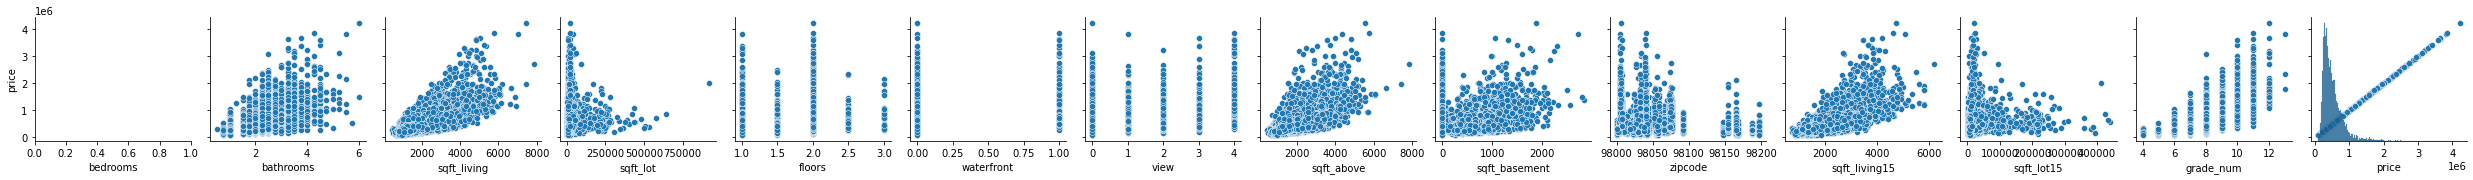

In [29]:
sns.pairplot(training_data, y_vars = 'price')

AttributeError: 'DataFrame' object has no attribute 'in_Seattle'